In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpgmpl9o6zGP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.01,
    'A_val': 0.39,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 100

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 5

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpolokkldtGP2/unet_0.model
History saved to /tmp/tmpolokkldtGP2/history_0.pickle
Testing the classifier...
94/94 [==============================] - 9s 100ms/step - loss: 1.4636 - dice_coeff: 0.2277
B (3000, 512, 512, 2)
A_test_with_pred_ (3000, 512, 512, 2)
Model saved to /tmp/tmpolokkldtGP2/cnnd_0.model
History saved to /tmp/tmpolokkldtGP2/cnnd_history_0.pickle
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 1.9513e-04 - accuracy: 1.0000
Found 276 machine labels.
Replacing 276 from 276 !
Removed: 181 Filled: 181
TOOK 1126.1694688796997 seconds
***
RUN: 1
Model saved to /tmp/tmpolokkldtGP2/unet_1.model
History saved to /tmp/tmpolokkldtGP2/history_1.pickle
Testing the classifier...
94/94 [==============================] - 9s 93ms/step - loss: 1.2271 - dice_coeff: 0.2969
B (3000, 512, 512, 2)
A_test_with_pred_ (3000, 512, 512, 2)
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
R.classifier_scores

[[1.4635831117630005, 0.22765666246414185],
 [1.2270680665969849, 0.2969350516796112],
 [0.30134445428848267, 0.7687167525291443]]

In [11]:
R.discriminator_scores

[[0.00019512658764142543, 1.0],
 [1.3768210411071777, 0.9116666913032532],
 [22.16776466369629, 0.5166666507720947]]

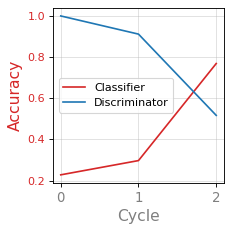

In [12]:
R.plot()